In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calc_power as cp
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# pagina 283

In [3]:
df_m = pd.read_csv("Dados_duracao_macho.csv")
df_m.head()


,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
0,31.466667,297.500000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305793f4d55ef029829b,5ea2305793f4d55ef0298297,macho,flx2.5mg,A1
1,34.566667,247.800000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305793f4d55ef02982a4,5ea2305793f4d55ef02982a0,macho,flx2.5mg,A2
2,119.900000,246.666667,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305893f4d55ef02982c8,5ea2305893f4d55ef02982c4,macho,flx2.5mg,A3
3,64.633333,245.700000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305993f4d55ef02982d1,5ea2305993f4d55ef02982cd,macho,flx2.5mg,A4
4,87.966667,247.500000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305993f4d55ef02982da,5ea2305993f4d55ef02982d6,macho,flx2.5mg,A5


In [4]:
df_f = pd.read_csv("Dados_duracao_femea.csv")
df_f.head()

,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
0,72.500000,247.033333,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298307,5ea2305b93f4d55ef0298303,femea,flx2.5mg,A1
1,40.000000,248.433333,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298310,5ea2305b93f4d55ef029830c,femea,flx2.5mg,A2
2,124.666667,246.100000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298319,5ea2305b93f4d55ef0298315,femea,flx2.5mg,A3
3,101.500000,248.000000,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298322,5ea2305c93f4d55ef029831e,femea,flx2.5mg,A4
4,38.766667,246.166667,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef029832b,5ea2305c93f4d55ef0298327,femea,flx2.5mg,A5


In [5]:
def get_dados(df, categoria):
    df_saida = df[df["dosagem"] == categoria]
    return df_saida["d_e_Immobility_s"]

In [6]:
# get_dados(df_f,"veiculo")

In [7]:
# get_dados(df_m,"veiculo")

In [8]:

# controle = np.array( [6.9, 7.6, 7.3, 7.6, 6.8, 7.2, 8.0, 5.5, 5.8, 7.3, 8.2, 6.9, 6.8, 5.7, 8.6])
# tratamento = np.array( [6.4, 6.7, 5.4, 8.2, 5.3, 6.6, 5.8, 5.7, 6.2, 7.1, 7, 6.9, 5.6, 4.2, 6.8]) 

# # qnt_dados = 15
# qt_medicoes_boots= 1000

In [119]:
# controle = get_dados(df_m,"veiculo")
# tratamento = get_dados(df_m,"flx2.5mg")
# qnt_aniamis = len(controle)
# lis_qnt_m, lis_powa_m = cp.Calc_poder(controle, tratamento, stats.mannwhitneyu, qnt_aniamis).get_list_qnt_powa()
# lis_qnt_t, lis_powa_t = cp.Calc_poder(controle, tratamento, stats.ttest_ind, qnt_aniamis).get_list_qnt_powa()
# lis_qnt_k, lis_powa_k = cp.Calc_poder(controle, tratamento, stats.kruskal, qnt_aniamis).get_list_qnt_powa()
def gera_grafico_controle(controle, tratamento, titulo, axes):
    
    qnt_aniamis = min([len(controle), len(tratamento)])
    lis_qnt_m, lis_powa_m = cp.Calc_poder(controle, tratamento, stats.mannwhitneyu, qnt_aniamis).get_list_qnt_powa()
    lis_qnt_t, lis_powa_t = cp.Calc_poder(controle, tratamento, stats.ttest_ind, qnt_aniamis).get_list_qnt_powa()
    lis_qnt_k, lis_powa_k = cp.Calc_poder(controle, tratamento, stats.kruskal, qnt_aniamis).get_list_qnt_powa()
    pot = cp.Calc_poder(controle, tratamento, stats.levene, qnt_aniamis, center="mean")
    lis_qnt_l, lis_powa_l = pot.get_list_qnt_powa()

    # stats.levene(get_dados(df_m,"veiculo"),get_dados(df_m,"flx2.5mg"), center="mean")

    xticks = lis_qnt_m
    print(lis_qnt_m)
    xlabels = list(map( lambda x: f"{x[0]+1} n",  enumerate(lis_qnt_m)))#[f'\\${x:1.2f}' for x in xticks]
    axes.set_xticks(xticks, labels=xlabels)
    
#     fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
#     fig.set_size_inches(7, 7)
    axes.scatter(lis_qnt_m, lis_powa_m, s=50, label="Mann-Whitney")
    axes.scatter(lis_qnt_t, lis_powa_t, s=50, label="teste T")
    axes.scatter(lis_qnt_k, lis_powa_k, s=50, label="Kruskal-Wallis")
    axes.scatter(lis_qnt_l, lis_powa_l, s=50, label="Levene" , marker="X")
    
    axes.axhline(80,color='blue')
    axes.set_title(titulo +  f" n={qnt_aniamis}", fontsize=14)
    # axes.set_xlim([0, 100])
    axes.set_ylim([0, 110])
    axes.legend(fontsize=10)
    axes.grid(color='black',axis="x", linestyle='--', linewidth=1)
    axes.set_ylabel("Poder da análise (%)", fontsize=10)
    axes.set_xlabel("Quantidade de dados na amostra\npor grupo", fontsize=10)
    return pot

#     plt.savefig("poder_analise_tshn_boots.png")


In [10]:
# len(controle)

[6, 12, 18, 24, 30, 36]
[8, 16, 24, 32, 40, 48]
[6, 12, 18, 24, 30, 36]
[6, 12, 18, 24, 30, 36]


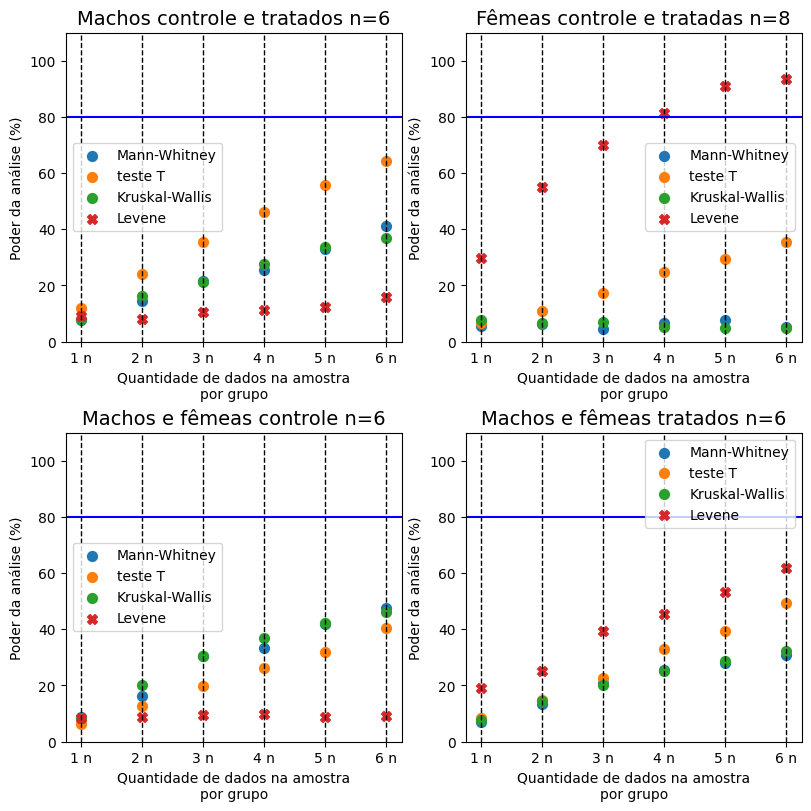

In [120]:
# fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
# fig.set_size_inches(7, 7)
# axes.scatter(lis_qnt_m, lis_powa_m, s=50, label="mannwhitneyu")
# axes.scatter(lis_qnt_t, lis_powa_t, s=50, label="ttest_ind")
# axes.scatter(lis_qnt_k, lis_powa_k, s=50, label="kruskal")
# axes.legend()
# axes.grid(color='r', linestyle='--', linewidth=1)
# axes.set_ylabel("Poder da análise (%)", fontsize=18)
# axes.set_xlabel("Quantidade de \n dados na amostra", fontsize=18)

# plt.savefig("poder_analise_tshn_boots.png")
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
fig.set_size_inches(8, 8)
gera_grafico_controle(get_dados(df_m,"veiculo"), get_dados(df_m,"flx2.5mg"),"Machos controle e tratados", axes[0][0])
gera_grafico_controle(get_dados(df_f,"veiculo"), get_dados(df_f,"flx2.5mg"),"Fêmeas controle e tratadas", axes[0][1])
gera_grafico_controle(get_dados(df_m,"veiculo"), get_dados(df_f,"veiculo"),  "Machos e fêmeas controle", axes[1][0])
gera_grafico_controle(get_dados(df_m,"flx2.5mg"), get_dados(df_f,"flx2.5mg"),"Machos e fêmeas tratados", axes[1][1])

plt.savefig("poder_analise_tshn_boots_TCC.png")

In [121]:
def gera_grafico_controle_shapiro(controle, titulo, axes):

    qnt_aniamis = len(controle)
    pot = cp.Calc_poder_one(controle, stats.shapiro, qnt_aniamis)
    lis_qnt_m, lis_powa_m = pot.get_list_qnt_powa()
    # lis_qnt_t, lis_powa_t = cp.Calc_poder(controle, tratamento, stats.ttest_ind, qnt_aniamis).get_list_qnt_powa()
    # lis_qnt_k, lis_powa_k = cp.Calc_poder(controle, tratamento, stats.kruskal, qnt_aniamis).get_list_qnt_powa()
    
#     fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
#     fig.set_size_inches(7, 7)
    axes.scatter(lis_qnt_m, lis_powa_m, s=50, label="Shapiro")
    axes.axhline(80,color='blue')

    # xticks = np.arange(1, 101, 20)
    xticks = lis_qnt_m
    print(lis_qnt_m)
    xlabels = list(map( lambda x: f"{x[0]+1} n",  enumerate(lis_qnt_m)))#[f'\\${x:1.2f}' for x in xticks]
    axes.set_xticks(xticks, labels=xlabels)


    # axes.scatter(lis_qnt_t, lis_powa_t, s=50, label="T teste")
    # axes.scatter(lis_qnt_k, lis_powa_k, s=50, label="Kruskal-Wallis")
    axes.set_title(titulo + f" n={qnt_aniamis}", fontsize=14)
    # axes.set_xlim([0, 110])
    axes.set_ylim([0, 110])
    axes.legend(fontsize=10)
    axes.grid(color='black', axis="x", linestyle='--', linewidth=1)
    axes.set_ylabel("Poder da análise (%)", fontsize=10)
    axes.set_xlabel("Quantidade de dados na amostra\npor grupo", fontsize=10)
    return pot

    
    

[6, 12, 18, 24, 30, 36]
[6, 12, 18, 24, 30, 36]
[9, 18, 27, 36, 45, 54]
[8, 16, 24, 32, 40, 48]


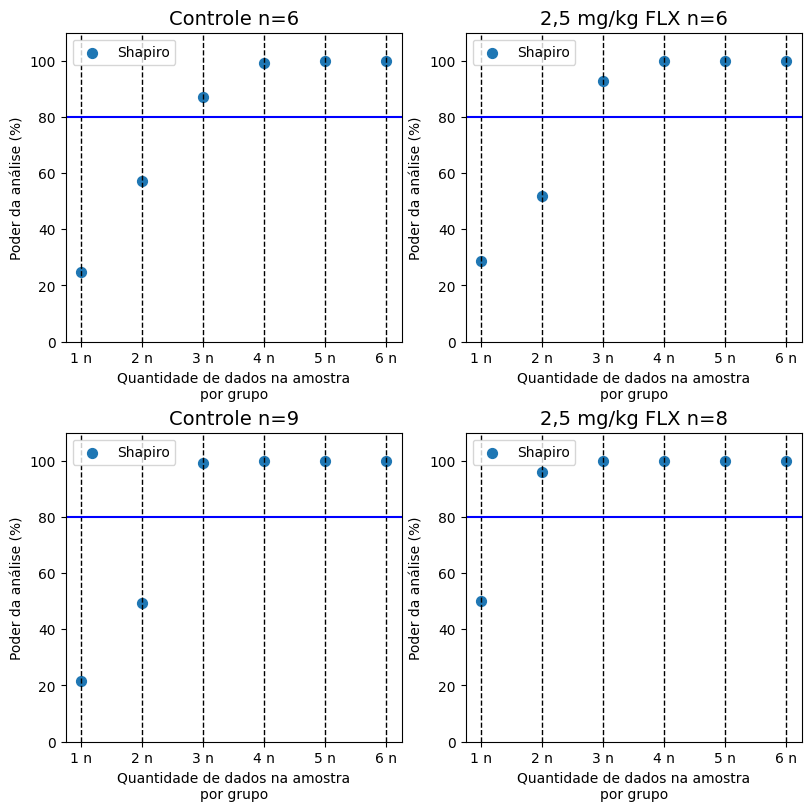

In [122]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
fig.set_size_inches(8, 8)
ls_pot = [gera_grafico_controle_shapiro(get_dados(df_m,"veiculo"),"Controle", axes[0][0]),
          gera_grafico_controle_shapiro(get_dados(df_m,"flx2.5mg"),"2,5 mg/kg FLX", axes[0][1]),
          gera_grafico_controle_shapiro(get_dados(df_f,"veiculo"),"Controle", axes[1][0]),
          gera_grafico_controle_shapiro(get_dados(df_f,"flx2.5mg"),"2,5 mg/kg FLX", axes[1][1])]
# gera_grafico_controle(get_dados(df_f,"veiculo"), get_dados(df_f,"flx2.5mg"),"TSHN usando o descritor de duração de Imobilidade \n entre os grupos de \nfêmeas controle e tratado", axes[0][1])
# gera_grafico_controle(get_dados(df_m,"veiculo"), get_dados(df_f,"veiculo"),"TSHN usando o descritor de duração de Imobilidade \n entre os grupos \ncontrole de machos e fêmeas", axes[1][0])
# gera_grafico_controle(get_dados(df_m,"flx2.5mg"), get_dados(df_f,"flx2.5mg"),"TSHN usando o descritor de duração de Imobilidade \n entre os grupos \ntratado de machos e fêmeas", axes[1][1])

plt.savefig("poder_analise_tshn_shapiro.png")

In [90]:
# gera_grafico_controle(get_dados(df_f,"veiculo"), get_dados(df_f,"flx2.5mg"))
p_controle = ls_pot[2]
p_controle.list_data[4][0]

array([ 48.13333333, 107.93333333, 116.36666667,  75.53333333,
       107.93333333,  75.16666667,  82.93333333, 107.93333333,
        75.53333333,  82.93333333,  85.2       ,  75.53333333,
       107.93333333,  34.1       ,  75.53333333,  48.13333333,
       116.36666667,  85.2       ,  82.93333333,  51.3       ,
       116.36666667, 116.36666667,  75.53333333,  51.3       ,
        82.93333333,  34.1       , 107.93333333, 107.93333333,
       116.36666667,  48.13333333,  34.1       ,  34.1       ,
        34.1       ,  75.53333333,  75.53333333,  75.16666667,
        75.53333333,  51.3       ,  34.1       ,  34.1       ,
        48.13333333,  48.13333333,  51.3       ,  75.16666667,
        82.93333333])

In [15]:
# gera_grafico_controle(get_dados(df_m,"veiculo"), get_dados(df_f,"veiculo"))

In [96]:
def create_graph(axs, df):
    mean  = np.mean(df)
    std  = np.std( df)
    data = np.random.normal(mean, std, 1000)
    weights = np.ones_like(data) / len(data)
    axs.hist(data, weights=weights)

    my_array = df
    weights = np.ones_like(my_array) / len(my_array)
    axs.hist(my_array, weights=weights,  bins=5)
    # axs.hist(data, bins=12, density=True)
    # axs.hist(my_array, bins=12, density=True)
    axs.set_ylim([0, 0.4])
    axs.set_xlim([0, 250])
    s, p= stats.shapiro(df)
    # print()
    print(mean, std, p)
    return axs

58.28518518518518 17.94980044671298 0.11126931011676788
76.10925925925928 24.710118898833997 0.14099811017513275
68.10370370370372 25.180396603585386 0.022859111428260803
74.9462962962963 29.058066895694857 0.000918389530852437
73.97407407407408 27.123960423967088 0.0014158280100673437
77.6567901234568 26.97783546094086 0.0003229020512662828


<Axes: >

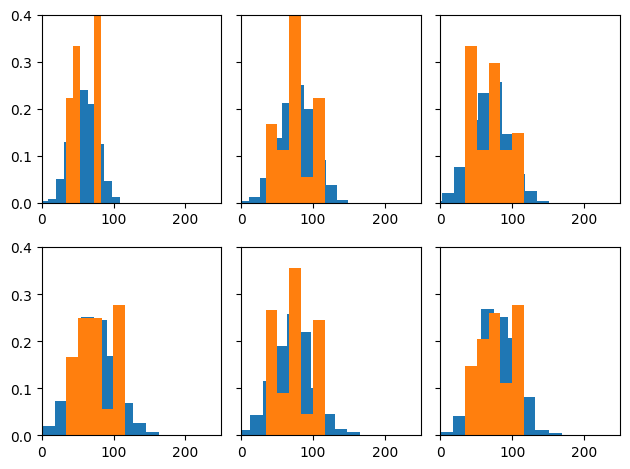

In [98]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
create_graph(axs[0][0], p_controle.list_data[0][0])#, "veiculo", "macho")
create_graph(axs[0][1], p_controle.list_data[1][0])#, "flx2.5mg", "macho")
create_graph(axs[0][2], p_controle.list_data[2][0])#, "veiculo", "femea")
create_graph(axs[1][0], p_controle.list_data[3][0])#, "flx2.5mg", "femea")
create_graph(axs[1][1], p_controle.list_data[4][0])#, "flx2.5mg", "macho")
create_graph(axs[1][2], p_controle.list_data[5][0])#, "veiculo", "femea")

In [78]:
 # p_controle.list_data[0][0]

In [77]:
# def create_y(df):
#     my_array = df
#     weights = np.ones_like(my_array) / len(my_array)
#     # axs.hist(my_array, weights=weights)
#     return weights
# x= list(range(1000))
# y = list(map( lambda x: p_controle.list_data[0][x], x))
# z = list(map( lambda x: create_y(x), y))
# def gera_novas_observacoes(todos_dados, qnt_dados):
#     saida = np.random.choice(todos_dados, qnt_dados, replace=True)
#     return saida

In [76]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(x, y, z, 50, cmap='binary')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');

In [85]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# nbins = 3
# for z in  range(100):
#     # ys = np.random.normal(loc=10, scale=10, size=2000)
#     ys = p_controle.list_data[5][z]
#     hist, bins = np.histogram(ys, bins=nbins)
#     xs = (bins[:-1] + bins[1:])/2

#     ax.bar(xs, hist, zs=z, zdir='x', alpha=0.8)


# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.show()

In [18]:
# def get_novas_observacoes(dados_reamostrar, qnt_dados, qnt_vezes=1000):
#     reamostrado_dados_reamostra= [] 
#     for a in range(qnt_vezes):
#         reamostrado_dados_reamostra.append(gera_novas_observacoes(dados_reamostrar, qnt_dados))
#     return reamostrado_dados_reamostra

In [19]:
# ls_reamostra_controle = get_novas_observacoes(controle, 15,100)
# ls_reamostra_tratamen = get_novas_observacoes(tratamento, 15,100)


In [20]:
# def get_powa(ls_reamostra_controle, ls_reamostra_tratamen, TSHN):
#     b=0
#     qnt_dados = len(ls_reamostra_controle)
#     for rea_controle, rea_tratamen in zip(ls_reamostra_controle, ls_reamostra_tratamen):
#         t_1 = ct.test_hipotese_scipy(rea_controle, rea_tratamen, TSHN)
#         r_rejeitou = t_1.get_p()
#     #     print(r_rejeitou)
#         if r_rejeitou:
#             b+=1

#     return b/qnt_dados * 100
    

In [21]:
# s,p = stats.mannwhitneyu(ls_reamostra_controle[0], ls_reamostra_tratamen[0])
# p*100

In [22]:
# stats.mannwhitneyu(ls_reamostra_controle[0], ls_reamostra_tratamen[0])

In [23]:
# lis_qnt = [5, 10, 15, 20, 25, 30]
# lis_powa = []
# for qnt in lis_qnt:
#     ls_reamostra_controle = get_novas_observacoes(controle, qnt, 100)
#     ls_reamostra_tratamen = get_novas_observacoes(tratamento, qnt, 100)
#     lis_powa.append(get_powa(ls_reamostra_controle,ls_reamostra_tratamen, stats.mannwhitneyu))


In [24]:
# lis_qnt = [5, 10, 15, 20, 25, 30]
# lis_powa_2 = []
# for qnt in lis_qnt:
#     ls_reamostra_controle = get_novas_observacoes(controle, qnt, 100)
#     ls_reamostra_tratamen = get_novas_observacoes(tratamento, qnt, 100)
#     lis_powa_2.append(get_powa(ls_reamostra_controle,ls_reamostra_tratamen, stats.ttest_ind))

In [25]:
# ls_reamostra_controle
# print(lis_qnt, lis_powa)

In [26]:
# lis_qnt = [5, 10, 15, 20, 25, 30]
# lis_powa_1 = []
# for qnt in lis_qnt:
#     ls_reamostra_controle = get_novas_observacoes(controle, qnt, 100)
#     ls_reamostra_tratamen = get_novas_observacoes(tratamento, qnt, 100)
#     lis_powa_1.append(get_powa(ls_reamostra_controle,ls_reamostra_tratamen, stats.kruskal))

In [27]:
# fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
# fig.set_size_inches(7, 7)
# axes.scatter(lis_qnt, lis_powa_2, s=50)
# axes.scatter(lis_qnt, lis_powa_1, s=50)
# axes.scatter(lis_qnt, lis_powa, s=50)
# axes.grid(color='r', linestyle='--', linewidth=1)
# axes.set_ylabel("Poder da análise (%)", fontsize=18)
# axes.set_xlabel("Quantidade de \n dados na amostra", fontsize=18)

In [28]:
# print(controle)
# print(tratamento)
# print(todos_dados)

In [29]:
# def gera_novas_observacoes(todos_dados, qnt_dados):
#     saida = np.random.choice(todos_dados, qnt_dados, replace=True)
#     return saida

# def get_dif_medias(controle, tratamento):
#     return np.mean(tratamento) - np.mean(controle)

In [30]:
# class Novo_experimento():
#     def __init__(self, todos_dados, qnt_dados):
#         self.todos_dados = todos_dados
#         self.qnt_dados = qnt_dados
#         self.controle = gera_novas_observacoes(todos_dados, qnt_dados)
#         self.controle_media = np.mean(self.controle)
        
#         self.tratamento = gera_novas_observacoes(todos_dados, qnt_dados)
#         self.tratamento_media = np.mean(self.tratamento)
        
#     def get_diferenca_entre_medias(self):
#         return get_dif_medias(self.controle, self.tratamento)

In [31]:
# np.mean(gera_novas_observacoes(todos_dados, qnt_dados)) 

In [32]:
# medicoes_boostrap = []
# # qt_medicoes_boots= 1000


# for _ in range(qt_medicoes_boots):
#     nova_medicao_exp = Novo_experimento(todos_dados, qnt_dados)
#     medicoes_boostrap.append(nova_medicao_exp)

In [33]:
# def map_dif_medias(nova_medicao_experimento: Novo_experimento):
#     return nova_medicao_experimento.get_diferenca_entre_medias()

# list_dif_meidas = list(map(map_dif_medias,medicoes_boostrap ))

In [34]:
# list_dif_meidas

In [35]:
# n, bins, patches = plt.hist(list_dif_meidas, 50, density=True, facecolor='g', alpha=0.75)

In [36]:
# def desenha_histo(data, qtn_dados, ax):
#     media_dif_medida_original = get_dif_medias(tratamento, controle)
# #     plt.rcParams.update({'font.size': 18,
# #                         'figure.figsize': (10,8)})
#     ax.hist(data, 50, facecolor='g', alpha=0.75)
#     ax.axis([-1.5, 1.5, 0,70]) 
#     ax.axvline(x=media_dif_medida_original)
    
    
# #     plt.text(-1, 50, "n={}".format(qtn_dados), fontsize=18)
#     ax.text(0.73, 50, "Média observada \nno experimento", fontsize=18, rotation=270)
#     ax.set_title("Gerado {} observações ".format(qtn_dados), fontsize=18)
#     ax.set_xlabel("Diferença da média \nmedida entre o grupo tratado \ne o controle", fontsize=18)
#     ax.set_ylabel("Quantidade de \nexperimentos", fontsize=18)
# #     


In [37]:
# len(list_dif_meidas[0:100])

In [38]:
# fig, axes = plt.subplots(ncols=2, nrows=5, constrained_layout=True)
# fig.set_size_inches(15.5, 20.5)
# plt.title("Distribuição da amostra\n pela técnica da Bootstrap", fontsize=18)
# desenha_histo(list_dif_meidas[0:100],100,axes[0,0])
# desenha_histo(list_dif_meidas[0:200],200,axes[0,1])
# desenha_histo(list_dif_meidas[0:300],300,axes[1,0] )
# desenha_histo(list_dif_meidas[0:400],400,axes[1,1])
# desenha_histo(list_dif_meidas[0:500],500,axes[2,0])
# desenha_histo(list_dif_meidas[0:600],600,axes[2,1])
# desenha_histo(list_dif_meidas[0:700],700,axes[3,0])
# desenha_histo(list_dif_meidas[0:800],800,axes[3,1])
# desenha_histo(list_dif_meidas[0:900],900,axes[4,0])
# desenha_histo(list_dif_meidas[0:1000],1000,axes[4,1])
# plt.savefig("bootstrao_tshn_subplot.png")

In [39]:
# media_dif_medida_original = get_dif_medias(tratamento, controle)
# plt.rcParams.update({'font.size': 18,
#                     'figure.figsize': (10,8)})
# plt.hist(list_dif_meidas, 50, facecolor='g', alpha=0.75)
# plt.axvline(x=media_dif_medida_original)
# plt.text(-1, 50, "n=1000", fontsize=18)
# plt.text(0.73, 50, "Média observada \nno experimento", fontsize=18, rotation=270)
# plt.title("Tecnica da reamostragem")
# plt.xlabel("Diferença da média medida entre o grupo tratado e o controle")
# plt.ylabel("Quantidade de experimentos")
# plt.savefig("bootstrao_tshn.png")


In [40]:
# def filt_experimento_mais_improvaveis_med(media_dif_medida_original):
#     def filter_aray(media_boots):
#         r_medicao_positiva = media_dif_medida_original >= 0
#         print(r_medicao_positiva)
        
#         if(r_medicao_positiva):
#             r_medicao_mais_improvavel = media_boots >= media_dif_medida_original
#             return r_medicao_mais_improvavel
#         else:
#             r_medicao_mais_improvavel = media_boots <= media_dif_medida_original
            
#             return r_medicao_mais_improvavel

In [41]:

# print(media_dif_medida_original)

In [42]:
# list_experimento_mais_imp = list(filter(filt_experimento_mais_improvaveis_med(media_dif_medida_original),list_dif_meidas))

In [43]:
# print(len(list_dif_meidas),len(list_experimento_mais_imp))

In [44]:
# a =0
# b=0
# r_medicao_positiva = media_dif_medida_original >= 0
# print(r_medicao_positiva)
# for a in range(1000):
# #     print(list_dif_meidas[a] )
# #     print(media_dif_medida_original)
#     if list_dif_meidas[a] >= media_dif_medida_original:
#         b +=1
#         print(b)

In [45]:

# def filter_aray(media_dif_medida_original, media_boots):
#     r_medicao_positiva = media_dif_medida_original >= 0
# #     print(r_medicao_positiva)

#     if(r_medicao_positiva):
#         r_medicao_mais_improvavel = media_boots >= media_dif_medida_original
# #         print(r_medicao_mais_improvavel)
#         return r_medicao_mais_improvavel
#     else:
#         r_medicao_mais_improvavel = media_boots <= media_dif_medida_original

#         return r_medicao_mais_improvavel

In [46]:
# def calc_p(media_dif_medida_original, list_dif_meidas):
#     qnt_dados = len(list_dif_meidas)
#     b =0
#     for a in range(qnt_dados):
#         r_valor_mais_infre = filter_aray(media_dif_medida_original, list_dif_meidas[a])
#         if(r_valor_mais_infre):
#             b+=1
    
#     return b/qnt_dados *100

In [47]:
# calc_p(media_dif_medida_original, list_dif_meidas)
# # print(calc_p(media_dif_medida_original, list_dif_meidas)<2.5)

In [48]:
# print(media_dif_medida_original)
# for a in range(1000):
# #     print(list_dif_meidas[a] )
# #     print(media_dif_medida_original)
#     filter_aray(list_dif_meidas[a], media_dif_medida_original)


In [49]:
# len(list_experimento_mais_imp)/qt_medicoes_boots

In [50]:
# len(list_experimento_mais_imp)


In [51]:
# class test_hipotese:
#     def __init__(self,controle, tratamento, qt_medicoes_boots=1000):
#         self.controle = controle
#         self.tratamento = tratamento
#         self.qt_medicoes_boots = qt_medicoes_boots
#         self.todos_dados = np.concatenate([controle, tratamento])
        
        
#         self.media_dif_medida_original = self._get_dif_medias(tratamento, controle)
#         self._calcula()
#         self._calc_list_medi()
#         self._calc_p()
    
#     def get_p(self, alpha=2.5):
#         print(self.p)
#         return self.p <2.5
    
#     def _get_dif_medias(self, tratamento, controle):
#         return np.mean(tratamento) - np.mean(controle)
        
#     def _calcula(self):
#         self.medicoes_boostrap = []
#         for _ in range(qt_medicoes_boots):
#             nova_medicao_exp = Novo_experimento(todos_dados, qnt_dados)
#             self.medicoes_boostrap.append(nova_medicao_exp)
            

#     def _calc_list_medi(self):
#         self.list_dif_meidas = []
#         def map_dif_medias(nova_medicao_experimento: Novo_experimento):
#             return nova_medicao_experimento.get_diferenca_entre_medias()

#         self.list_dif_meidas = list(map(map_dif_medias, self.medicoes_boostrap ))

        
#     def _calc_p(self):
#         def filter_aray(media_dif_medida_original, media_boots):
#             r_medicao_positiva = media_dif_medida_original >= 0
            
#             if(r_medicao_positiva):
#                 r_medicao_mais_improvavel = media_boots >= media_dif_medida_original
#                 return r_medicao_mais_improvavel
#             else:
#                 r_medicao_mais_improvavel = media_boots <= media_dif_medida_original
#                 return r_medicao_mais_improvavel
        
#         def calc_p(media_dif_medida_original, list_dif_meidas):
#             qnt_dados = len(list_dif_meidas)
#             b =0
#             for a in range(qnt_dados):
#                 r_valor_mais_infre = filter_aray(media_dif_medida_original, list_dif_meidas[a])
#                 if(r_valor_mais_infre):
#                     b+=1
  
#             return b/qnt_dados *100

#         self.p = calc_p(self.media_dif_medida_original, self.list_dif_meidas)

In [52]:
# t_1 = test_hipotese(controle, tratamento)
# t_1.get_p()